# Clustering jerárquico y Dendrogamas

Notación:

* **X:** dataset (array de n x m) de puntos a clusterizar
* **n:** nº de datos
* **m:** nº de rasgos 
* **Z:** array de enlace del cluster con la información de las uniones
* **k:** nº de clusters

# 0. Preparación previa

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet #Para calcular el coef. de correlación cofenético
from scipy.spatial.distance import pdist #Para calcular la dist. original entre puntos

In [141]:
mainpath = "/Users/irene/Documents/GitHub/python-ml-course/datasets"  #Ruta ficheros
filename = "movies/movies.csv" #Fichero a abrir
fullpath = mainpath + "/" + filename #Ruta completa

df = pd.read_csv(fullpath, sep=";")
df.head(2)

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9


In [142]:
movies = df.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [143]:
df[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


# Dendrogamas

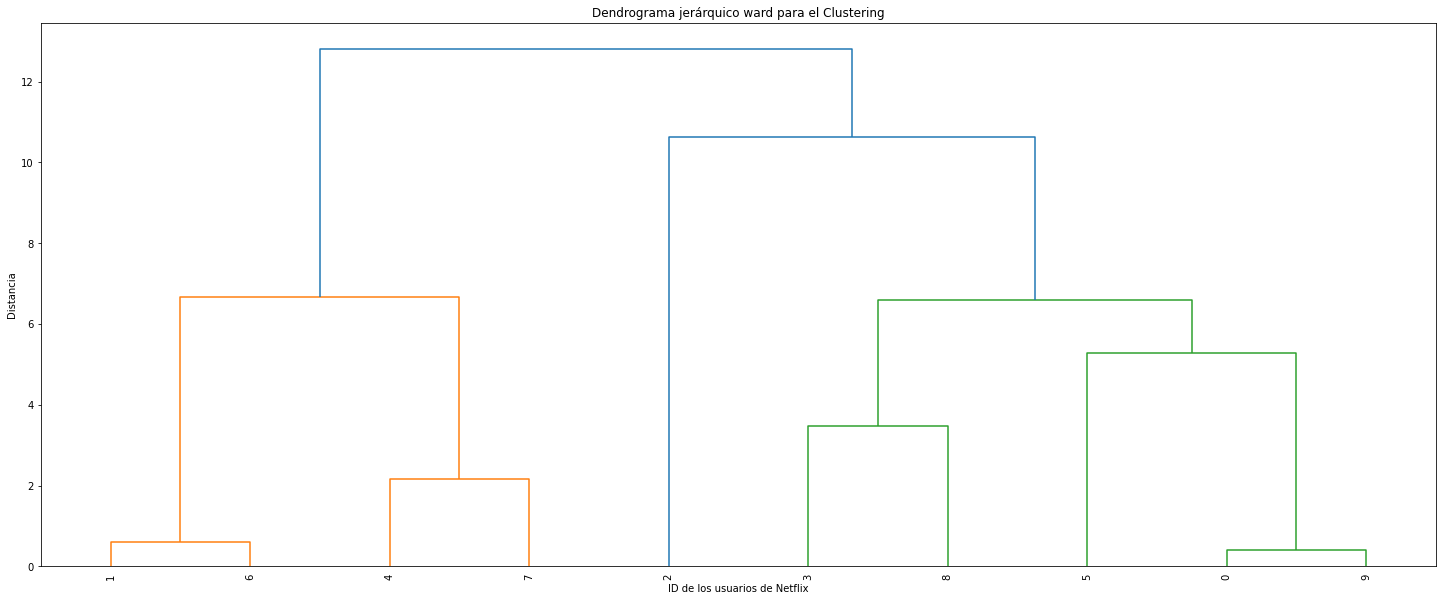

In [144]:
#Calculamos la Matriz Z
Z = linkage(df[movies], "ward") #Enlace de ward, Distancias euclídeas
Z

#Representamos el Dendograma
plt.figure(figsize=(25,10))
plt.title("Dendrograma jerárquico ward para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.0) #Rotación de las etiquetas
plt.show()

**Funciones de distancia que podemos usar:**

‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’

**Diferentes tipos de enlace:**

'single', 'complete', 'average'...

# Clustering jerárquico

## 0. Generamos un dataset aleatoriamente

(150, 2)


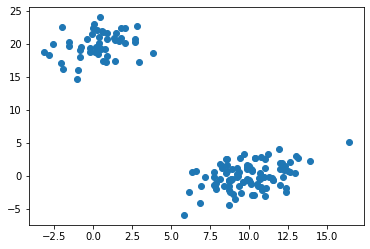

In [145]:
#Multivariate_normal = distrib. Normal que varían en varias dimensiones

np.random.seed(4711) #Semilla 
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,]) #100 puntos en torno al 10 (x) con desv. tip de 3 en horizontal y 4 en vertical 
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,]) #50 puntos en torno al 20 (y) con desv. tip de 3 en horizontal y 4 en vertical
X = np.concatenate((a,b)) #Dataset
print(X.shape) #Tamaño
plt.scatter(X[:,0], X[:,1]) #Plot, de todas las filas, 1ª columna
plt.show()

In [146]:
#Genero la matriz de enlace

Z = linkage(X, "ward")

In [147]:
#Comprobamos el coef. de correlación cofenético -> valida si el clúster se ha hecho bien -> resta las distancias
#obtenidas en la matriz Z con las distancias reales entre los puntos

c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

### Representación gráfica de un dendrograma

Dendrograma = representación visual en forma de árbol de los clústeres jerárquicos

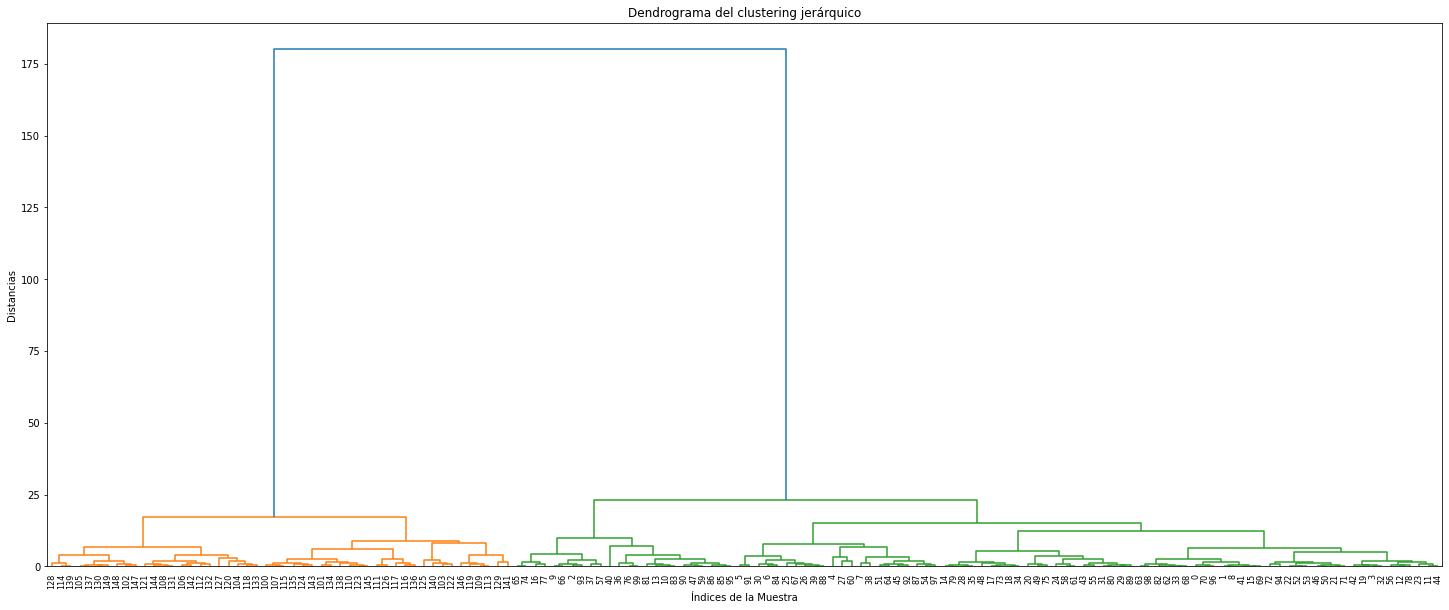

In [148]:
#Problema: se visualiza mal

plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")

#Umbral a partir del cuál queremos pintar los clústers, por defecto es el 70% de la distancia final (180)
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180) 
plt.show()

### Truncar el dendrograma

Para hacerlo más sencillo, una versión reducida

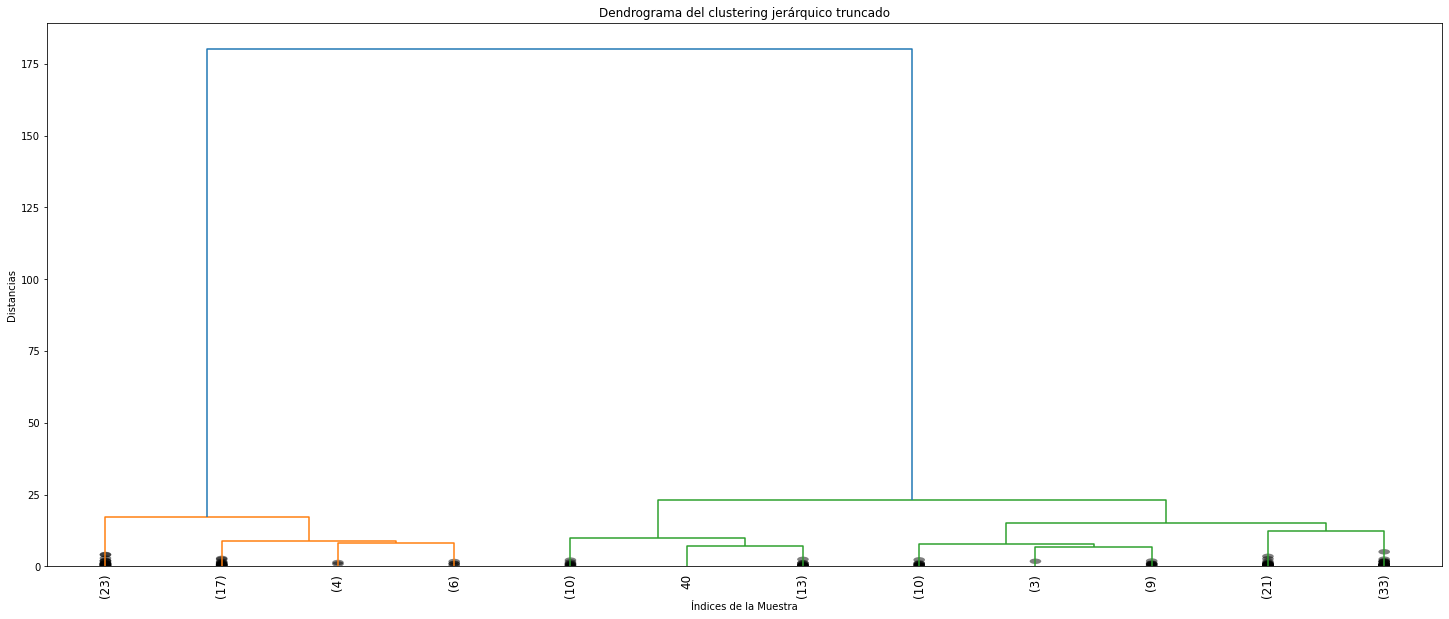

In [149]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")

#Lastp y p = para mostrar sólo los 10 últimos clústers unidos
#show_leaf_counts -> muestra el nº de elementos hay dentro de cada clúster
#show_contracted -> para ver cuántos elementos tiene cada clústers (bolas negras)

dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True)
plt.show()

### Dendrograma tuneado

Para mostrar la altura de unión de los clústers

In [150]:
#Para entender la función ver la clase 123

def dendrogram_tune(*args, **kwargs): #Argumento y keywords
    
    max_d=kwargs.pop("max_d", None) #Máxima distancia
    if max_d and 'color_threshold' not in kwargs: #
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

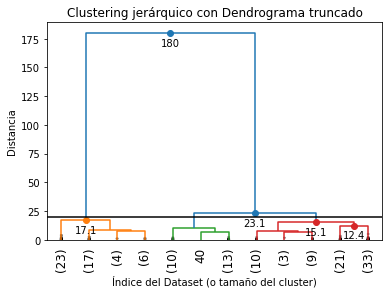

In [151]:
dendrogram_tune(Z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True, annotate_above=10, max_d=20)
plt.show()

### Corte automático del dendrograma

NO ES LA MEJOR TÉCNICA

Selección automática de "max_d=" que es la línea horizontal a partir de la cuál cortas el dendrograma y a partir de la cuál se distinguen los clústers -> para ello: se usa el método de la consistencia -> averigua qué es lo que hace que la distancia de un clúster a otro salte. O cuáles de estas distancias nosotros consideramos que es un salto cuantitativo suficientemente importante.

inconsistency_i = (h_i-avg(h_j))/std(h_j)

In [152]:
from scipy.cluster.hierarchy import inconsistent

In [153]:
depth = 3
#Nos da [el promedio][dev.std][el nº de elementos][el factor de inconsistencia]
incons = inconsistent(Z, depth)
#De normal nos interesa ver las últimas uniones
incons[-10:]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

### Método del codo

ALTERNATIVA AL CORTE AUTOMÁTICO

Se busca el aumento de la aceleración (el mayor codo) que se puede generar cuando se dibuja la línea de los incrementos de un clúster a otro.

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


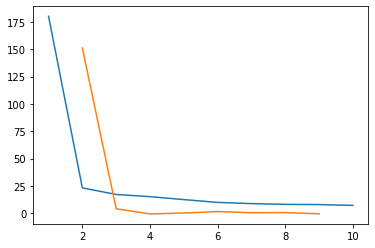

El número óptimo de cluster es 2


In [164]:
last = Z[-10:,2] #Nos quedamos con las últimas uniones de clústers (Z) y con sus distancias (2da columna)
last_rev = last[::-1] #Revertimos la lista
print(last_rev) 
idx = np.arange(1, len(last)+1) #Índices con los que vamos a hacer la representación
plt.plot(idx, last_rev) #Pintamos las diferencias en orden revertido

acc = np.diff(last,2) #Diferencias en los cambios, array de aceleraciones, resta de los últimos de 2 en 2
acc_rev = acc[::-1] #Revertimos el array
plt.plot(idx[:-2]+1, acc_rev) #Al haber hecho una resta sale desde el punto 2, pintamos del 2 al 9
plt.show()
k = acc_rev.argmax() +2 #Para buscar el elemento máximo de aceleración revertida
print("El número óptimo de cluster es %s"%str(k))

# Elaboramos otro dataset para probar

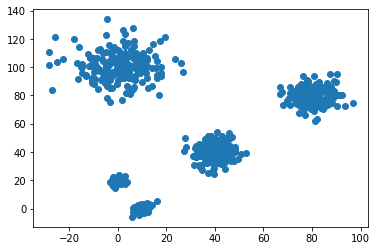

In [165]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [166]:
Z2 = linkage(X2,"ward")

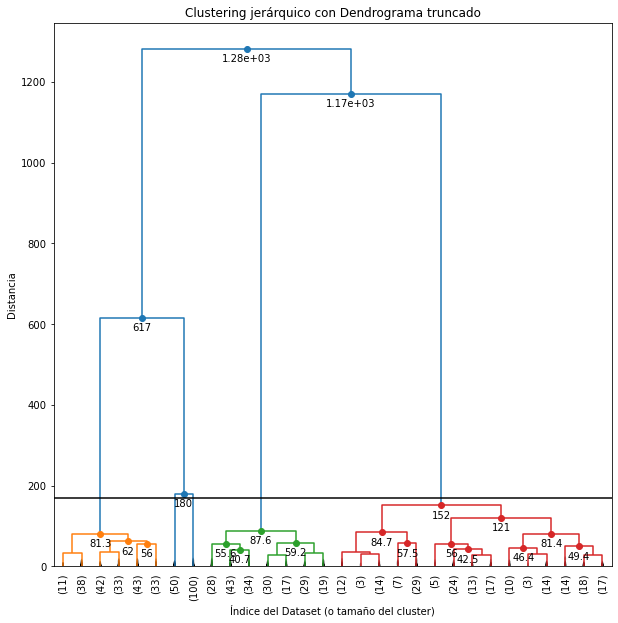

In [167]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above = 40,
    max_d = 170
)

plt.show()

[1282.46706354 1170.98586166  616.54762239  180.27043021  151.60666456
  121.12826348   87.63025871   84.6531831    81.40781749   81.26914533]


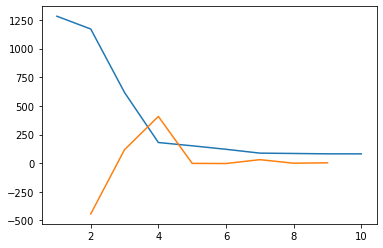

El número óptimo de cluster es 4


In [168]:
#Método del codo optimizado

last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [169]:
print(inconsistent(Z2, 5)[-10:])

[[ 17.77607317  18.87474236  30.           3.36391729]
 [ 15.23571589  17.63042243  29.           3.75329076]
 [ 17.5423546   18.98041797  25.           3.53579297]
 [ 19.71893206  18.70559634  31.           3.63053524]
 [ 25.39008081  26.21789135  28.           3.6516355 ]
 [ 36.46474732  34.13171399  30.           3.3734584 ]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 43.46845429 111.71230335  31.           5.12995571]
 [ 80.34950945 205.0127263   31.           5.31984707]
 [147.0446429  308.44162511  31.           3.68115821]]


## Recuperar los clusters y sus elementos

Vamos a ver cómo quedan al final los clústers

In [170]:
from scipy.cluster.hierarchy import fcluster

In [176]:
#Para el primer ejemplo, nos quedamos con 2 clústers
max_d=25 #Línea de corte
clusters = fcluster(Z, max_d, criterion="distance")
clusters #150 elementos, uno para cada índice

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [177]:
#En lugar de cortar por distancias podemos cortar por nº de clústers (k)

k=2
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [178]:
#Otra opción es usar el método de la inconsistencia

fcluster(Z, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

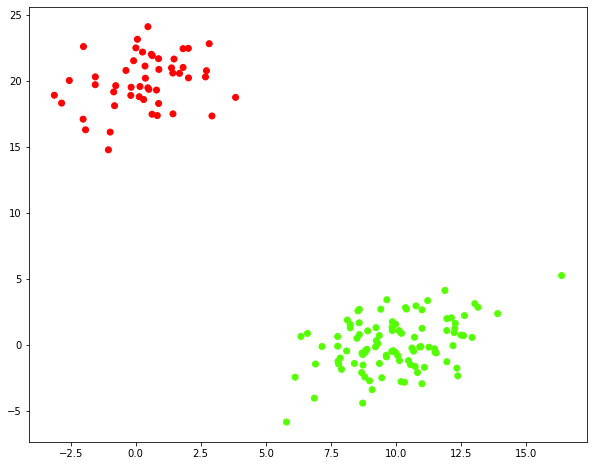

In [179]:
#Para visualizar mejor los clústers, primer ejemplo

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism")
plt.show()

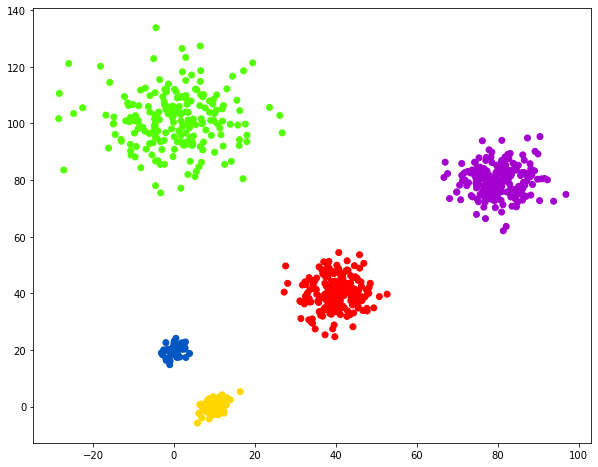

In [185]:
#Para visualizar mejor los clústers, segundo ejemplo

max_d = 170 #Prueba a cambiar el corte para ver diferentes clústers
clusters = fcluster(Z2, max_d, criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap="prism")
plt.show()